In [125]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
import itertools

import warnings
warnings.filterwarnings('ignore')

In [126]:
import sys
sys.path.insert(0, '../_functions_')

from functions_eda import *

In [127]:
babies = pd.read_csv('../Final Project/datasets/BD_Final Project - nascuts_vius_BCN.csv')

## Data cleaning and exploring

In [128]:
babies.info()
# the values are all integers, so this is what I need.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    49 non-null     int64
 1   Boys    49 non-null     int64
 2   Girls   49 non-null     int64
 3   Total   49 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [129]:
babies.head()

,Year,Boys,Girls,Total
0,2023,5874,5504,11378
1,2022,6090,5511,11601
2,2021,6135,5840,11975
3,2020,6312,5967,12279
4,2019,6626,6273,12899


In [130]:
# Checking the shape of the dataframe
babies.shape

(49, 4)

In [131]:
# There aren't any NaN values
babies.isnull().sum()

Year     0
Boys     0
Girls    0
Total    0
dtype: int64

## 1 - First I want to see the evolution of babies born in Barcelona through the years. For that, I'm going to try different plots to see each one shows better the data.

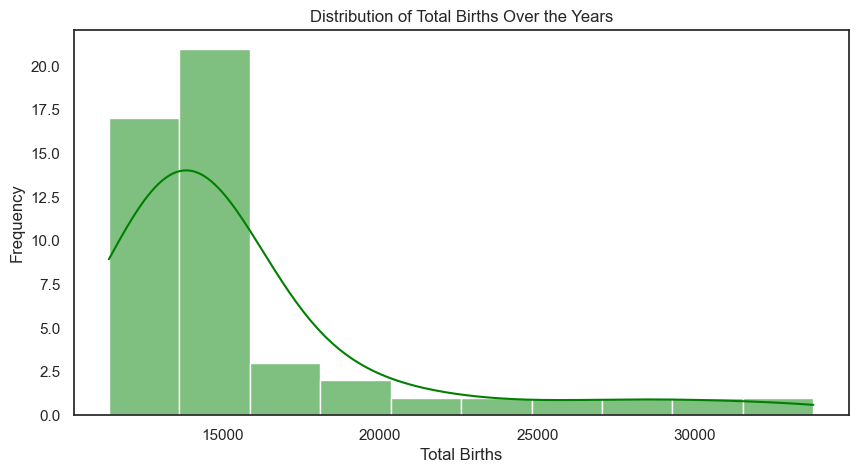

In [132]:
# Seaborn Histogram - this one won't work because I can't add the variable Year
plt.figure(figsize=(10,5))
sns.histplot(babies["Total"], bins=10, kde=True, color="green")
plt.xlabel("Total Births")
plt.ylabel("Frequency")
plt.title("Distribution of Total Births Over the Years")
plt.show()



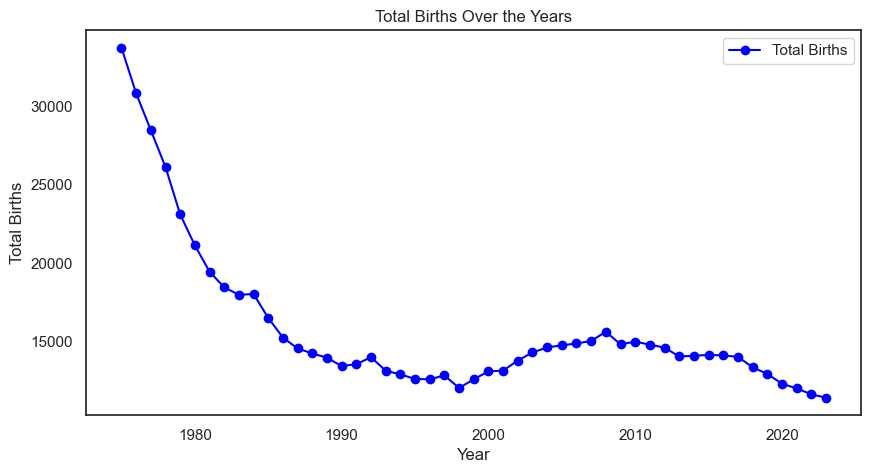

In [133]:
# Matplotlib Alternative (Line Plot)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Total"], marker="o", linestyle="-", color="blue", label="Total Births")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Total Births Over the Years")
plt.legend()
plt.grid(False)
plt.show()

In [134]:
# Plotly Alternative (Interactive Bar Chart) - I'll use this one, maybe after I tuned it
fig = px.bar(babies, x="Year", y="Total", title="Total Births Over the Years", labels={"Total": "Total Births"}, color="Total")
fig.show()

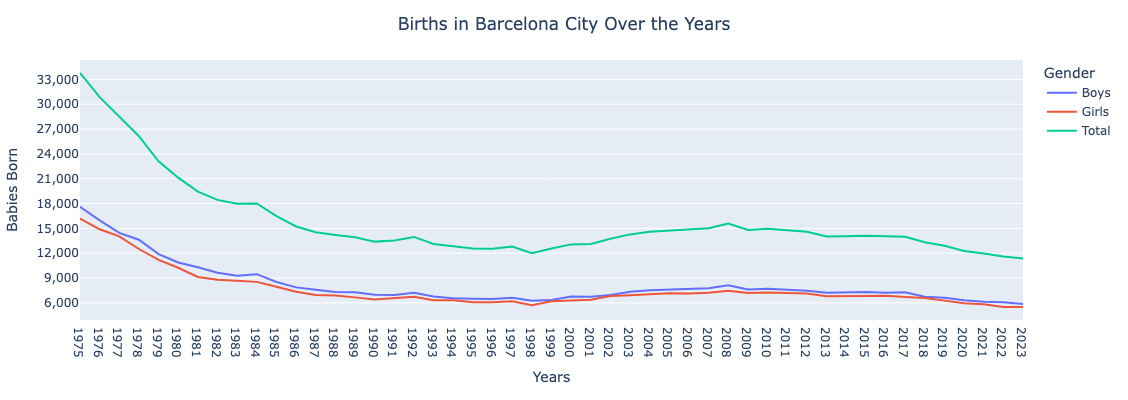

In [135]:
# With the total variable
# Step 1: Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls", 'Total']
             )

# Update the layout of the plot with a title
fig.update_layout(title_text='Births in Barcelona City Over the Years',
                  title_x=0.5,  # Centers the title
                  xaxis_title='Years',
                  yaxis_title='Babies Born',
                  legend_title='Gender',
                  width=1000,  # Set the width of the plot (increase for wider)
                  height=400   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=1,  # Forces tick marks to appear every 1 year
    tickmode="linear",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=3000, # Adjusts tick marks to show every 3,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=True  # Optional: shows grid lines for better readability
)

# Step 2: Show the plot
fig.show()

## 2 - Second I'll present this data into more detail, just out of curiosity: boys vs girls 

In [136]:
# Without the total variable
# Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls"],
             ) 


# Update the layout of the plot with a title
fig.update_layout(title_text='Boys and Girls Births Over the Years',
                  title_x=0.5,  # Centers the title
                 xaxis_title='Years',
                 yaxis_title='# Babies Born',
                 legend_title='Gender',
                 width=1000,  # Set the width of the plot (increase for wider)
                 height=400   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=1,  # Forces tick marks to appear every 1 year
    tickmode="linear",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=1000, # Adjusts tick marks to show every 1,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=True  # Optional: shows grid lines for better readability
)

# Show the plot
fig.show()

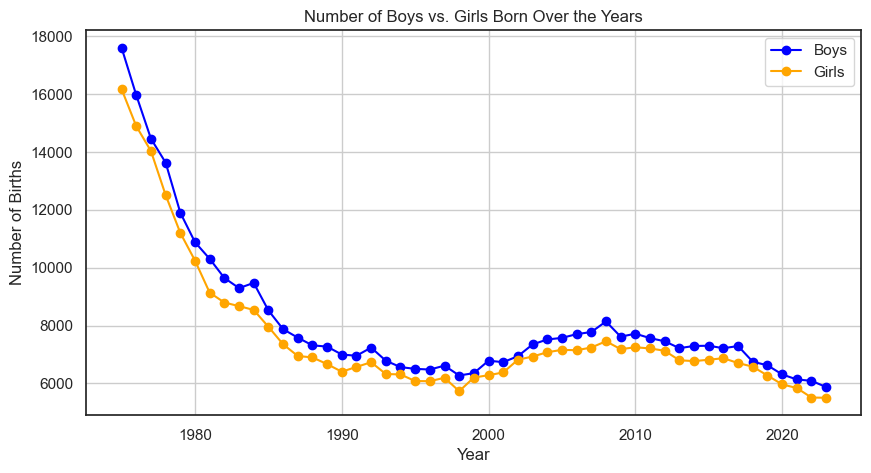

In [137]:
# Other options:
# Line Plot (Matplotlib)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Boys"], marker="o", linestyle="-", label="Boys", color="blue")
plt.plot(babies["Year"], babies["Girls"], marker="o", linestyle="-", label="Girls", color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Number of Boys vs. Girls Born Over the Years")
plt.legend()
plt.grid(True)
plt.show()

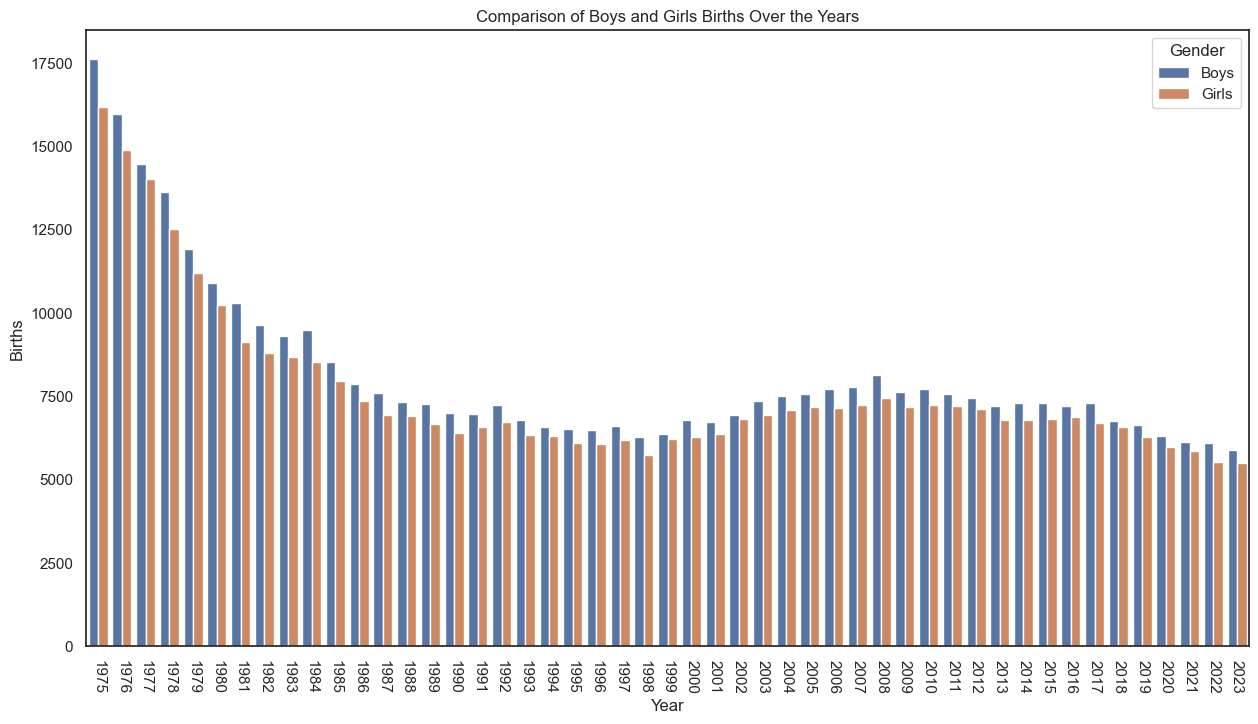

In [138]:
# Grouped Bar Chart (Seaborn)
plt.figure(figsize=(15,8))
b_melted = babies.melt(id_vars="Year", value_vars=["Boys", "Girls"], var_name="Gender", value_name="Births")
sns.barplot(x="Year", y="Births", hue="Gender", data=b_melted)
plt.title("Comparison of Boys and Girls Births Over the Years")
plt.xticks(rotation=-90)
plt.show()

In [139]:
# Plotly Interactive Bar Chart
fig = px.bar(b_melted, x="Year", y="Births", color="Gender", barmode="group",
             title="Comparison of Boys and Girls Births Over the Years")
fig.show()

## New dataset - Public and Private Schools and Professors

In [140]:
centers = pd.read_csv('../Final Project/datasets/BD_Final Project - Centres_Professors_infantil_primaria.csv')

In [141]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Curs                15 non-null     object
 1   Centres_Públics     15 non-null     int64 
 2   Centres_Privats     15 non-null     int64 
 3   Centres_Total       15 non-null     int64 
 4   Professors_Públics  15 non-null     int64 
 5   Professors_Privats  15 non-null     int64 
 6   Professors_Total    15 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 972.0+ bytes


In [142]:
centers.head()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
0,2022/2023,408,440,848,8904,7793,16697
1,2021/2022,401,448,849,8641,7902,16543
2,2020/2021,400,468,868,8197,8297,16494
3,2019/2020,392,487,879,8126,8482,16608
4,2018/2019,389,488,877,8111,8572,16683


In [143]:
centers.shape

(15, 7)

In [144]:
centers.isnull().sum()

Curs                  0
Centres_Públics       0
Centres_Privats       0
Centres_Total         0
Professors_Públics    0
Professors_Privats    0
Professors_Total      0
dtype: int64

In [145]:
centers.nunique()

Curs                  15
Centres_Públics       11
Centres_Privats       14
Centres_Total         13
Professors_Públics    15
Professors_Privats    15
Professors_Total      15
dtype: int64

In [146]:
centers.tail()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
10,2012/2013,382,462,844,7134,8119,15253
11,2011/2012,379,473,852,7388,8313,15701
12,2010/2011,347,465,812,7196,8252,15448
13,2009/2010,341,473,814,7033,8377,15410
14,2008/2009,331,471,802,7041,8360,15401


In [147]:
centers['Centres_Públics'].unique()

array([408, 401, 400, 392, 389, 386, 382, 379, 347, 341, 331])

In [148]:
centers['Centres_Privats'].unique()

array([440, 448, 468, 487, 488, 486, 490, 491, 507, 445, 462, 473, 465,
       471])

In [149]:
centers['Centres_Total'].unique()

array([848, 849, 868, 879, 877, 875, 893, 831, 844, 852, 812, 814, 802])

In [150]:
centers.rename(columns={"Centres_Públics":"Centres_Publics", "Professors_Públics": "Professors_Publics"}, inplace=True)

In [151]:
centers.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

## 3 - Create a bar chart comparing the number of public and private schools over the years. Since 2008, when more children were born, until 2023, the last data available

In [152]:
# Step 1: Create the traces of the plots
fig = px.bar(centers, 
             x = 'Curs', 
             y = ['Centres_Publics', 'Centres_Privats'], 
             labels={'Curs': 'School Term', 'Centres_Publics': 'Public Centers', 'Centres_Privats': 'Private Centers'},
             text_auto=True, # Add text labels automatically)
             category_orders={'Curs': sorted(centers['Curs'].unique(), key=lambda x: str(x))}  # Sort x-axis in ascending order
            )  

# Step 2: Update legend names manually
fig.for_each_trace(lambda t: t.update(name={'Centres_Publics': 'Public Centers', 
                                            'Centres_Privats': 'Private Centers'}[t.name]))

# Step 3: Adjust text position and angle
fig.update_traces(textangle=50,  # Rotate text 50º
                  textposition="outside")  # Ensure text is visible above bars

# Step 4: Update the layout of the plot
fig.update_layout(title_text='# Public vs Privat Schools',
                  title_x=0.5,  # Centers the title
                  xaxis_title='School Term',
                  yaxis_title='Number of Centers',
                  legend_title='Type of School',
                  width=1000,  # Set the width of the plot (increase for wider)
                  height=625,
                  barmode='group') # display multiple bars for each category side by side

# Step 5: Show the plot
fig.show()

In [153]:
centers_1 = centers

In [154]:
centers_1.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

In [155]:
centers_1 = centers_1.drop(columns=['Professors_Publics', 'Professors_Privats', 'Professors_Total'])

In [156]:
centers_1.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total'], dtype='object')

In [157]:
#1 Calculate Year-on-Year Change (Growth)
centers_1['Publics_Growth'] = centers_1['Centres_Publics'].pct_change() * 100 # percentage change
centers_1['Privats_Growth'] = centers_1['Centres_Privats'].pct_change() * 100 # percent change
centers_1['Total_Growth'] = centers_1['Centres_Total'].pct_change() * 100 # percent change

In [159]:
#2 Calculate Percentage Share of Publics and Privates
centers_1['Public_Percentage'] = (centers_1['Centres_Publics'] / centers_1['Centres_Total']) * 100
centers_1['Private_Percentage'] = (centers_1['Centres_Privats'] / centers_1['Centres_Total']) * 100

In [178]:
centers_1 = centers_1.round({'Publics_Growth': 2,
                        'Privats_Growth': 2,
                        'Total_Growth':2,
                        'Public_Percentage': 2,
                        'Private_Percentage': 2})

In [179]:
centers_1

,Curs,Centres_Publics,Centres_Privats,Centres_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,408,440,848,NaN,NaN,NaN,48.11,51.89
1,2021/2022,401,448,849,-1.72,1.82,0.12,47.23,52.77
2,2020/2021,400,468,868,-0.25,4.46,2.24,46.08,53.92
3,2019/2020,392,487,879,-2.00,4.06,1.27,44.60,55.40
4,2018/2019,389,488,877,-0.77,0.21,-0.23,44.36,55.64
5,2017/2018,389,486,875,0.00,-0.41,-0.23,44.46,55.54
6,2016/2017,389,490,879,0.00,0.82,0.46,44.25,55.75
7,2015/2016,386,491,877,-0.77,0.20,-0.23,44.01,55.99
8,2014/2015,386,507,893,0.00,3.26,1.82,43.23,56.77
9,2013/2014,386,445,831,0.00,-12.23,-6.94,46.45,53.55


In [180]:
sorted_years = sorted(teachers['Curs'].astype(str).unique())

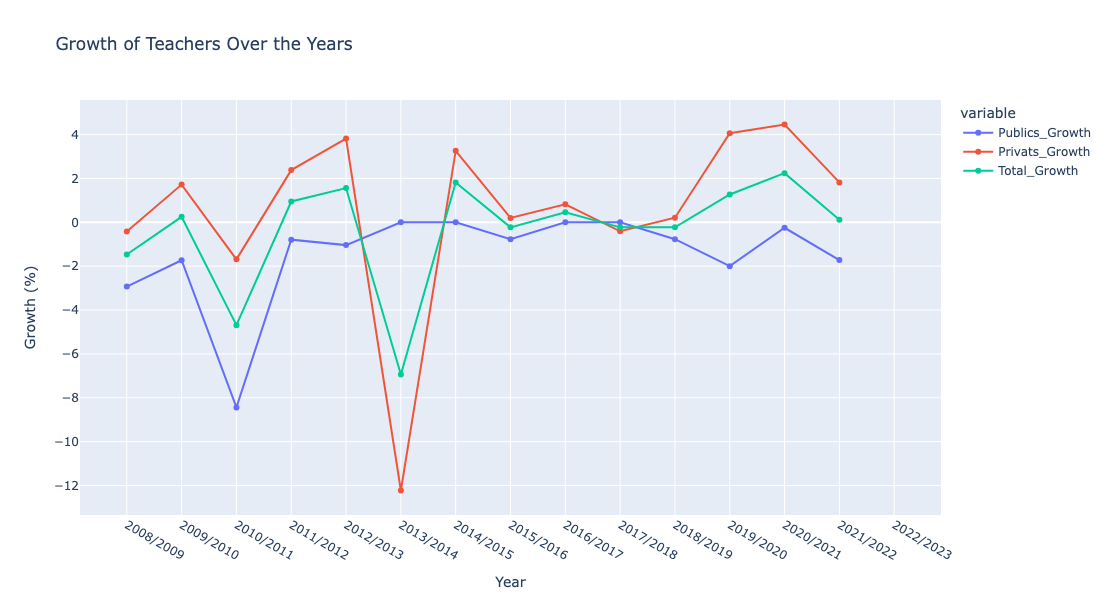

In [181]:
# Plotting 1: Year-on-Year Growth
fig1 = px.line(centers_1,
              x="Curs",
              y=["Publics_Growth", "Privats_Growth", "Total_Growth"],
              markers=True,
              title="Growth of Teachers Over the Years",
               labels={"Publics_Growth": "Public Teachers Growth (%)",
                      "Privats_Growth": "Private Teachers Growth (%)",
                      "Total_Growth": "Total Growth (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig1.update_layout(
    xaxis_title="Year",
    yaxis_title="Growth (%)",
    width=1000,
    height=600
)

# Show the plot
fig1.show()

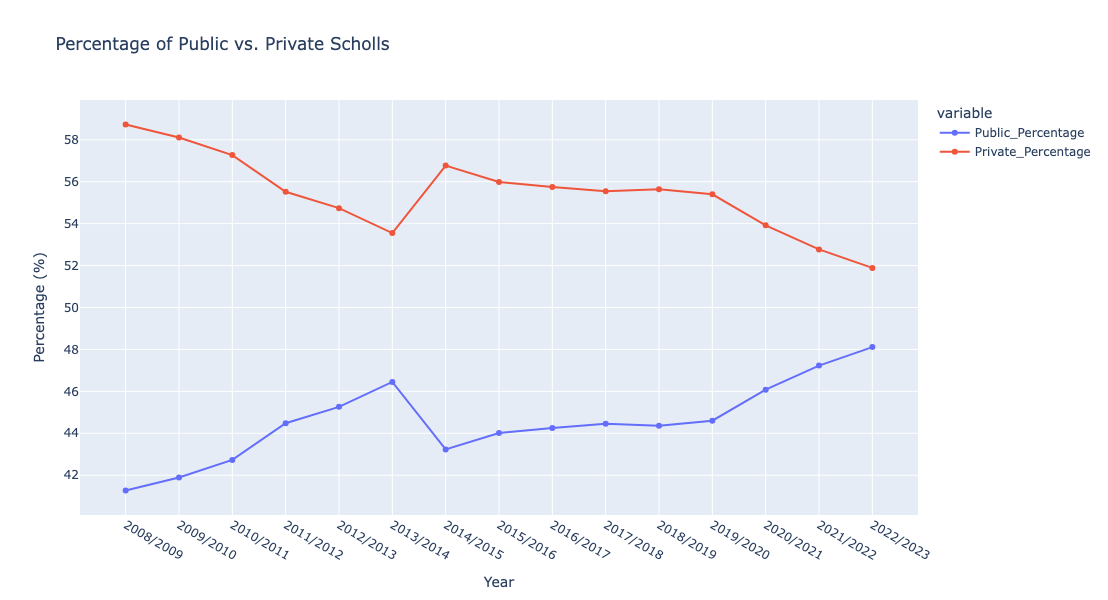

In [184]:
# Plotting 2: Percentage Share of Public and Private Professors
fig2 = px.line(centers_1, 
               x="Curs", 
               y=["Public_Percentage", "Private_Percentage"],
               markers=True,
               title="Percentage of Public vs. Private Scholls",
               labels={"Public_Percentage": "Public (%)", 
                       "Private_Percentage": "Private (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    width=1000,
    height=600
)

# Show the plot
fig2.show()

## 4 - Create plots comparing the number of public and private teachers over the years --> Since 2008, when more children were born, until 2023, the last data available.

In [160]:
centers.head()

,Curs,Centres_Publics,Centres_Privats,Centres_Total,Professors_Publics,Professors_Privats,Professors_Total
0,2022/2023,408,440,848,8904,7793,16697
1,2021/2022,401,448,849,8641,7902,16543
2,2020/2021,400,468,868,8197,8297,16494
3,2019/2020,392,487,879,8126,8482,16608
4,2018/2019,389,488,877,8111,8572,16683


In [161]:
print(centers.columns)

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')


In [162]:
teachers = centers

In [163]:
teachers.columns

Index(['Curs', 'Centres_Publics', 'Centres_Privats', 'Centres_Total',
       'Professors_Publics', 'Professors_Privats', 'Professors_Total'],
      dtype='object')

In [164]:
teachers = teachers.drop(columns=['Centres_Publics', 'Centres_Privats', 'Centres_Total'])

In [165]:
teachers

,Curs,Professors_Publics,Professors_Privats,Professors_Total
0,2022/2023,8904,7793,16697
1,2021/2022,8641,7902,16543
2,2020/2021,8197,8297,16494
3,2019/2020,8126,8482,16608
4,2018/2019,8111,8572,16683
5,2017/2018,7965,8621,16586
6,2016/2017,7571,8350,15921
7,2015/2016,7595,8337,15932
8,2014/2015,7291,8260,15551
9,2013/2014,7302,8234,15536


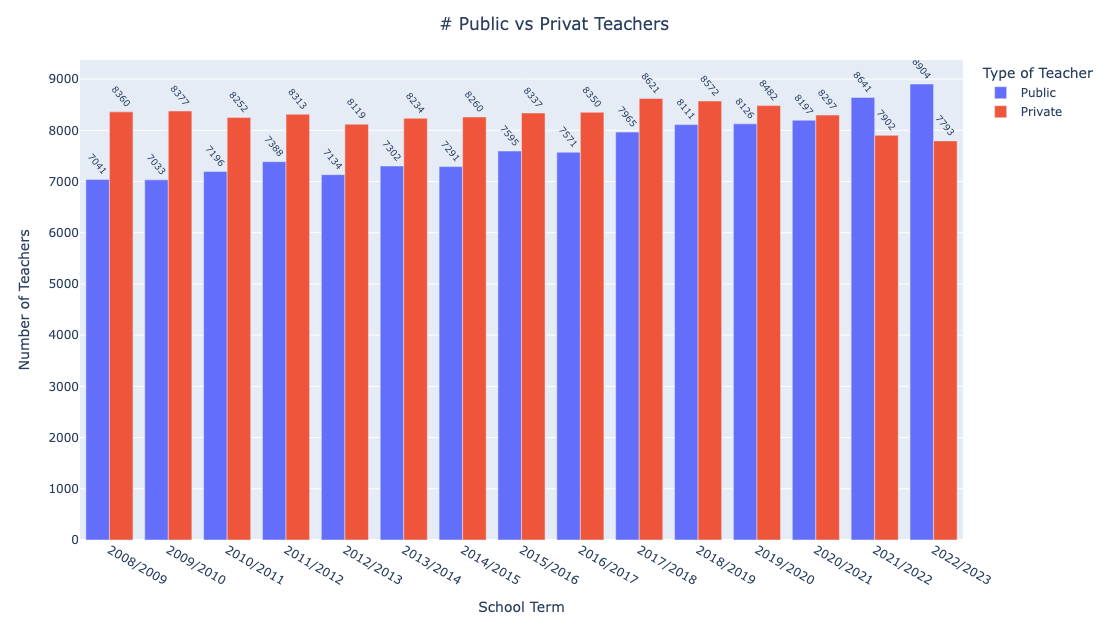

In [183]:
# Step 1: Create the traces of the plots
fig = px.bar(teachers, 
             x = 'Curs', 
             y = ['Professors_Publics', 'Professors_Privats'], 
             labels={'Curs': 'School Term', 'Professors_Publics': 'Public Teachers', 'Professors_Privats': 'Private Teachers'},
             text_auto=True, # Add text labels automatically)
             category_orders={'Curs': sorted(centers['Curs'].unique(), key=lambda x: str(x))}  # Sort x-axis in ascending order
            )  

# Step 2: Update legend names manually
fig.for_each_trace(lambda t: t.update(name={'Professors_Publics': 'Public', 
                                            'Professors_Privats': 'Private'}[t.name]))

# Step 3: Adjust text position and angle
fig.update_traces(textangle=50,  # Rotate text 50º
                  textposition="outside")  # Ensure text is visible above bars

# Step 4: Update the layout of the plot
fig.update_layout(title_text='# Public vs Privat Teachers',
                  title_x=0.5,  # Centers the title
                  xaxis_title='School Term',
                  yaxis_title='Number of Teachers',
                  legend_title='Type of Teacher',
                  width=1000,  # Set the width of the plot (increase for wider)
                  height=625,
                  barmode='group') # display multiple bars for each category side by side

# Step 5: Show the plot
fig.show()

In [166]:
#1 Calculate Year-on-Year Change (Growth)
teachers['Publics_Growth'] = teachers['Professors_Publics'].pct_change() * 100 # percentage change
teachers['Privats_Growth'] = teachers['Professors_Privats'].pct_change() * 100 # percent change
teachers['Total_Growth'] = teachers['Professors_Total'].pct_change() * 100 # percent change

In [167]:
#2 Calculate Percentage Share of Publics and Privates
teachers['Public_Percentage'] = (teachers['Professors_Publics'] / teachers['Professors_Total']) * 100
teachers['Private_Percentage'] = (teachers['Professors_Privats'] / teachers['Professors_Total']) * 100

In [168]:
#3 Convert 'Curs' to string for proper sorting
sorted_years = sorted(teachers['Curs'].astype(str).unique())

In [169]:
teachers.head(10)

,Curs,Professors_Publics,Professors_Privats,Professors_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,8904,7793,16697,NaN,NaN,NaN,53.326945,46.673055
1,2021/2022,8641,7902,16543,-2.953729,1.398691,-0.922321,52.233573,47.766427
2,2020/2021,8197,8297,16494,-5.138294,4.998734,-0.296198,49.696859,50.303141
3,2019/2020,8126,8482,16608,-0.866171,2.229722,0.691160,48.928227,51.071773
4,2018/2019,8111,8572,16683,-0.184593,1.061071,0.451590,48.618354,51.381646
5,2017/2018,7965,8621,16586,-1.800025,0.571629,-0.581430,48.022429,51.977571
6,2016/2017,7571,8350,15921,-4.946642,-3.143487,-4.009406,47.553546,52.446454
7,2015/2016,7595,8337,15932,0.316999,-0.155689,0.069091,47.671353,52.328647
8,2014/2015,7291,8260,15551,-4.002633,-0.923594,-2.391414,46.884445,53.115555
9,2013/2014,7302,8234,15536,0.150871,-0.314770,-0.096457,47.000515,52.999485


In [170]:
teachers = teachers.round({'Publics_Growth': 2,
                        'Privats_Growth': 2,
                        'Total_Growth':2,
                        'Public_Percentage': 2,
                        'Private_Percentage': 2})

In [171]:
teachers.head(10)

,Curs,Professors_Publics,Professors_Privats,Professors_Total,Publics_Growth,Privats_Growth,Total_Growth,Public_Percentage,Private_Percentage
0,2022/2023,8904,7793,16697,NaN,NaN,NaN,53.33,46.67
1,2021/2022,8641,7902,16543,-2.95,1.40,-0.92,52.23,47.77
2,2020/2021,8197,8297,16494,-5.14,5.00,-0.30,49.70,50.30
3,2019/2020,8126,8482,16608,-0.87,2.23,0.69,48.93,51.07
4,2018/2019,8111,8572,16683,-0.18,1.06,0.45,48.62,51.38
5,2017/2018,7965,8621,16586,-1.80,0.57,-0.58,48.02,51.98
6,2016/2017,7571,8350,15921,-4.95,-3.14,-4.01,47.55,52.45
7,2015/2016,7595,8337,15932,0.32,-0.16,0.07,47.67,52.33
8,2014/2015,7291,8260,15551,-4.00,-0.92,-2.39,46.88,53.12
9,2013/2014,7302,8234,15536,0.15,-0.31,-0.10,47.00,53.00


## Detailed Breakdown of Visualizations:

1.	Year-on-Year Growth:
    -	We calculate the percentage growth of public, private, and total professors for each year. This will show how each category has changed in terms of growth rate.
    -	Plot: Line plot showing the growth percentage over the years.

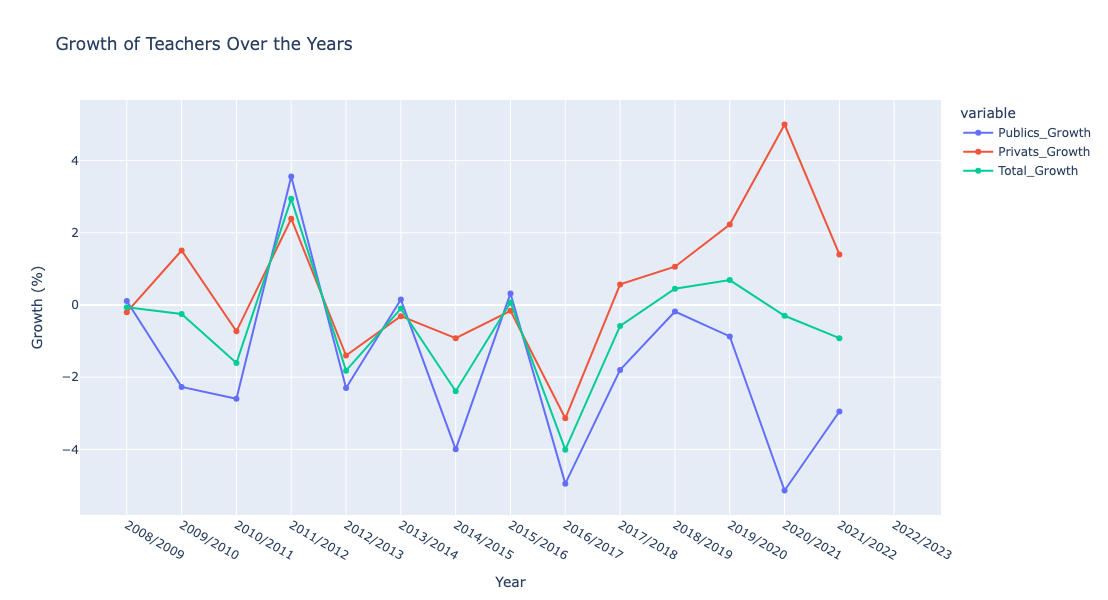

In [172]:
# Plotting 1: Year-on-Year Growth
fig1 = px.line(teachers,
              x="Curs",
              y=["Publics_Growth", "Privats_Growth", "Total_Growth"],
              markers=True,
              title="Growth of Teachers Over the Years",
               labels={"Publics_Growth": "Public Teachers Growth (%)",
                      "Privats_Growth": "Private Teachers Growth (%)",
                      "Total_Growth": "Total Growth (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig1.update_layout(
    xaxis_title="Year",
    yaxis_title="Growth (%)",
    width=1000,
    height=600
)

# Show the plot
fig1.show()

2.	Percentage Share of Public vs. Private Professors:
	-	For each year, we calculate the percentage of public and private professors as part of the total number of professors.
	-	Plot: Line plot comparing the percentage share of public and private professors.

Related news: https://www.edubcn.cat/es/noticias/detalle?59955 - some schools changed from private to public, and as a result, the status of teachers also changed:
"Desde el curso 2020-2021 seis centros concertados se han incorporado a la red pública de la ciudad. El primero fue el colegio Inmaculada Concepción (Institut Escola Eixample), y el curso 2021-2022 lo hicieron 4 escuelas de la Fundación Escola Vicenciana; actuament instituto escuela Sicilia (Eixample), instituto escuela Londres (Eixample), escuela Aldana (Eixample), instituto escuela Elisabets (Ciutat Vella). Y este curso también la ya mencionada escuela Projecte de Sarrià-Gervasi, que pasará a ser el instituto escuela Projecte."

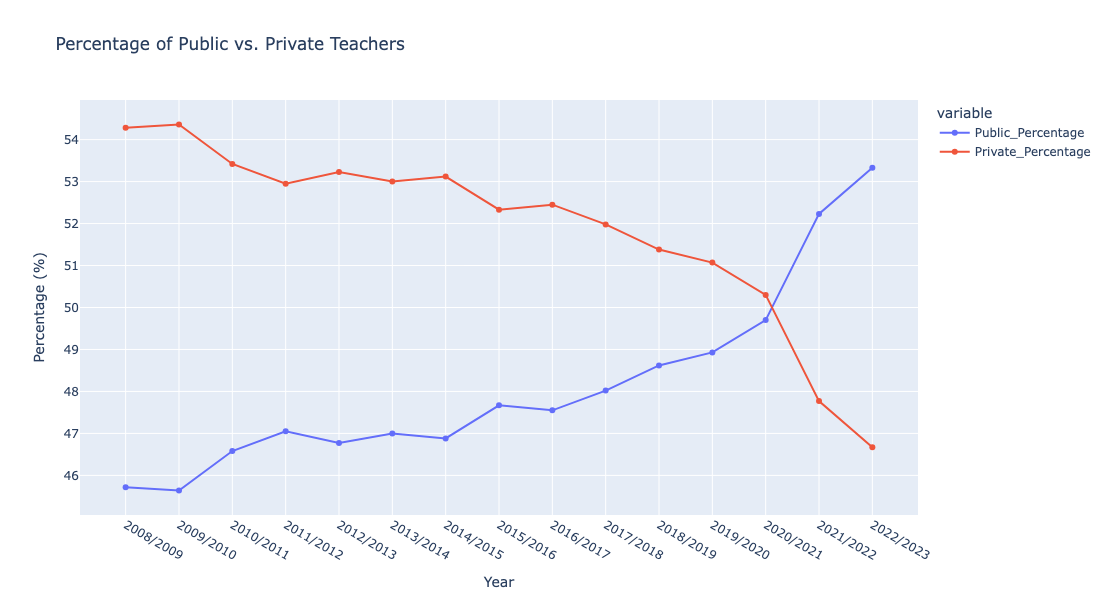

In [176]:
# Plotting 2: Percentage Share of Public and Private Professors
fig2 = px.line(teachers, 
               x="Curs", 
               y=["Public_Percentage", "Private_Percentage"],
               markers=True,
               title="Percentage of Public vs. Private Teachers",
               labels={"Public_Percentage": "Public (%)", 
                       "Private_Percentage": "Private (%)"},
              category_orders={'Curs': sorted_years})  # Sort x-axis in ascending order)

fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    width=1000,
    height=600
)

# Show the plot
fig2.show()

3.	Growth Comparison Between Public and Private Professors:

	-	We compare the absolute number of public and private professors for each year, with the size of the points reflecting the total number of professors.
	-	Plot: Scatter plot showing the relationship between public and private professors with a size scale based on the total professors in each year.

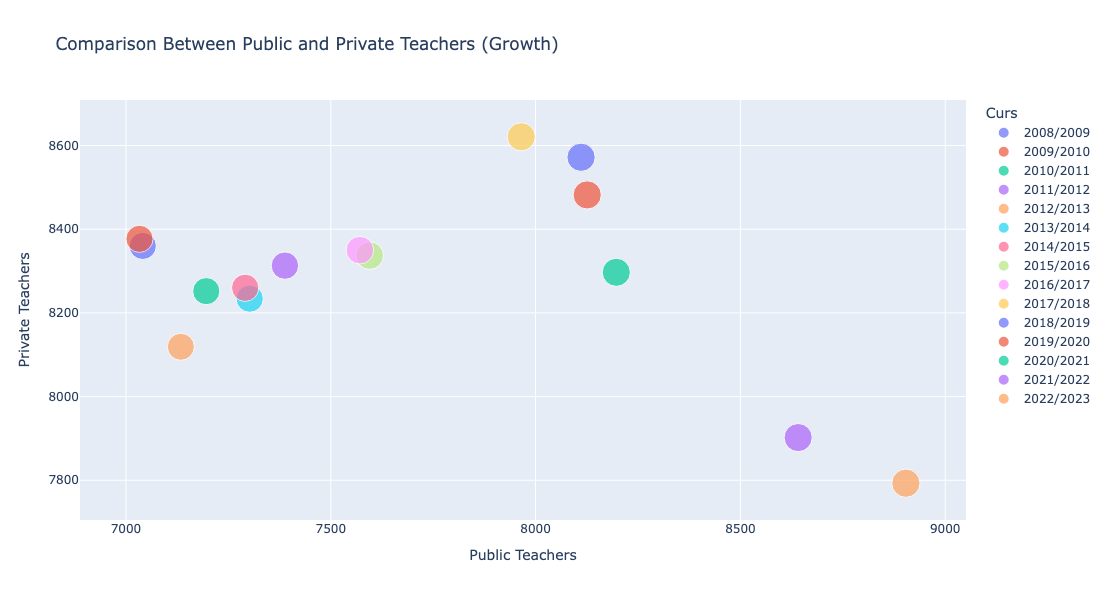

In [174]:
# Plotting 3: Professor Growth Comparison (Public vs. Private)
fig3 = px.scatter(teachers, 
                  x="Professors_Publics", 
                  y="Professors_Privats", 
                  color="Curs",  # Use a continuous color scale 
                  size="Professors_Total", 
                  color_continuous_scale="Viridis",  # Choose a color gradient
                  title="Comparison Between Public and Private Teachers (Growth)",
                  labels={"Professors_Publics": "Public Teachers", 
                          "Professors_Privats": "Private Teachers", 
                          "Professors_Total": "Total Teachers"},
                 category_orders={'Curs': sorted_years} # Sort x-axis in ascending order)
                # color_discrete_sequence=px.colors.qualitative.Safe  # Change color palette
                                  )

fig3.update_layout(
    xaxis_title="Public Teachers",
    yaxis_title="Private Teachers",
    width=1000,
    height=600
)

# Show the plot
fig3.show()

Insights:

-	Growth Trends: See if public or private professors are growing faster or if there are years with sharp declines.
-	Share Comparison: Analyze how the percentage of public vs. private professors has changed over time.
-	Growth Comparison: Compare the raw numbers of public and private professors in each year, highlighting any significant shifts in balance between the two categories.